In [331]:
import re
import numpy as np
import math
from matplotlib import pyplot as plt
import timeit
import time


In [332]:
with open("example.txt") as f:
    data = f.read()
    lines = data.strip().split("\n")

In [333]:
with open("input.txt") as f:
    data = f.read()
    lines = data.strip().split("\n")

In [334]:
#board = np.array([list(x) for x in lines])
#plt.matshow(screen)

In [335]:
mx = 0
my = 0
stones = []
for line in lines:
    stone = []
    points = [(int(x[0]),int(x[1])) for x in re.findall(r"(\d+),(\d+)",line)]
    #print(line)
    for point in points:
        mx = max(mx,point[0])
        my = max(my,point[1])
        stone.append(point)
    #print(mx,my)
    stones.append(stone)

In [336]:
print(mx,my)

536 178


In [342]:
part2 = True
if part2:
    my += 2
board = np.zeros((mx+301,my+1))
for stone in stones:
    #print(stone)
    for i in range(len(stone)-1):
        first = stone[i]
        second = stone[i+1]
        #print(first,second)
        #print(min(first[0],second[0]),max(first[0],second[0])+1,min(first[1],second[1]),max(first[1],second[1])+1)

        board[min(first[0],second[0]):max(first[0],second[0])+1,min(first[1],second[1]):max(first[1],second[1])+1] = 1

if part2:
    board[:,-1] = 1

In [338]:
#board[498:499,4:6] = 1

In [339]:
def isIn(board,point):
    return (point[0] < board.shape[0] and point[1] < board.shape[1])

def dropSand(board):
    point = (500,0)
    stable = False
    if board[point] == 2:
        print("full")
        return False
    while not stable:
        below = (point[0],point[1]+1)
        left = (below[0]-1,below[1])
        right = (below[0]+1,below[1])
        if not isIn(board,below):
            print("fell down")
            break
        if board[below] == 0:
            point = below
        #elif board[below] == 1:
        #    board[point] = 2
        #    stable = True
        #elif board[below] == 2:
        else:
            if not isIn(board,left):
                print("passed left")
                break
            elif board[left] == 0:
                point = left
            elif not isIn(board,right):
                print("passed right")
                break
            elif board[right] == 0:
                point = right
            else:
                board[point] = 2
                stable = True
    return stable

In [340]:
tic = time.perf_counter()


i = 0
while dropSand(board) and i < 100000:
    i += 1
    #print(board[490:,:].T)
    
toc = time.perf_counter()
print(f"finished in {toc - tic:0.4f} seconds")


full
finished in 4.4746 seconds


In [279]:
sum(sum(board == 2))

30762

In [280]:
board.shape

(837, 181)

In [281]:
print(i)

30762


In [282]:
32118

32118

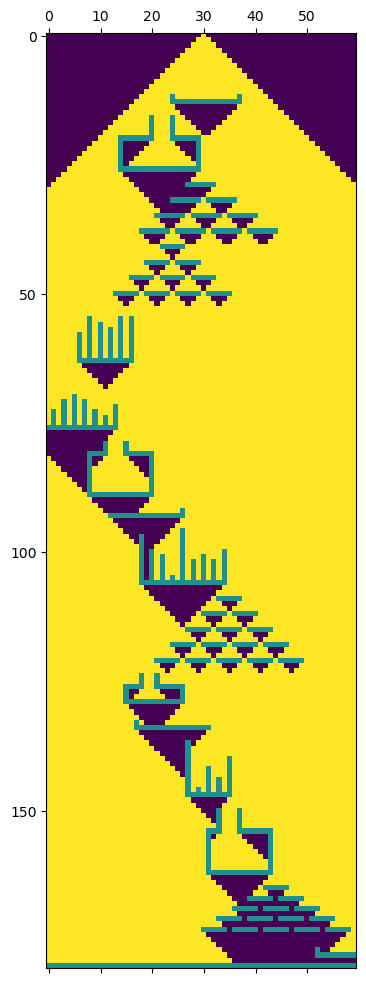

In [322]:
plt.matshow(board[470:530,:].T)

In [343]:
def isIn(board,point):
    return (point[0] < board.shape[0] and point[1] < board.shape[1])

# this version works better than the one above because it can remember it's state and backtrack instead of repeating the sand falling each time
def dropSand(board,point=(500,0)):
    #canPlace = False
    if not isIn(board,point):
        return False
    if board[point] == 1:
        return True
    if board[point] == 2:
        #print("full")
        return True
    below = (point[0],point[1]+1)
    left = (below[0]-1,below[1])
    right = (below[0]+1,below[1])
    canPlace = dropSand(board,below)
    canPlace &= dropSand(board,left)
    canPlace &= dropSand(board,right)
    if canPlace:
        board[point] = 2
        return True
    else:
        return False

In [321]:
dropSand(board)

True

In [329]:
timeit.timeit(pass,numper=1)

SyntaxError: invalid syntax (3597169892.py, line 1)

In [344]:
tic = time.perf_counter()


i = 0
dropSand(board)
    
toc = time.perf_counter()
print(f"finished in {toc - tic:0.4f} seconds")


finished in 0.0926 seconds
